**Digit Detection using NN with Mnist Data set**

In [ ]:
#packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#print shape of dataset
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


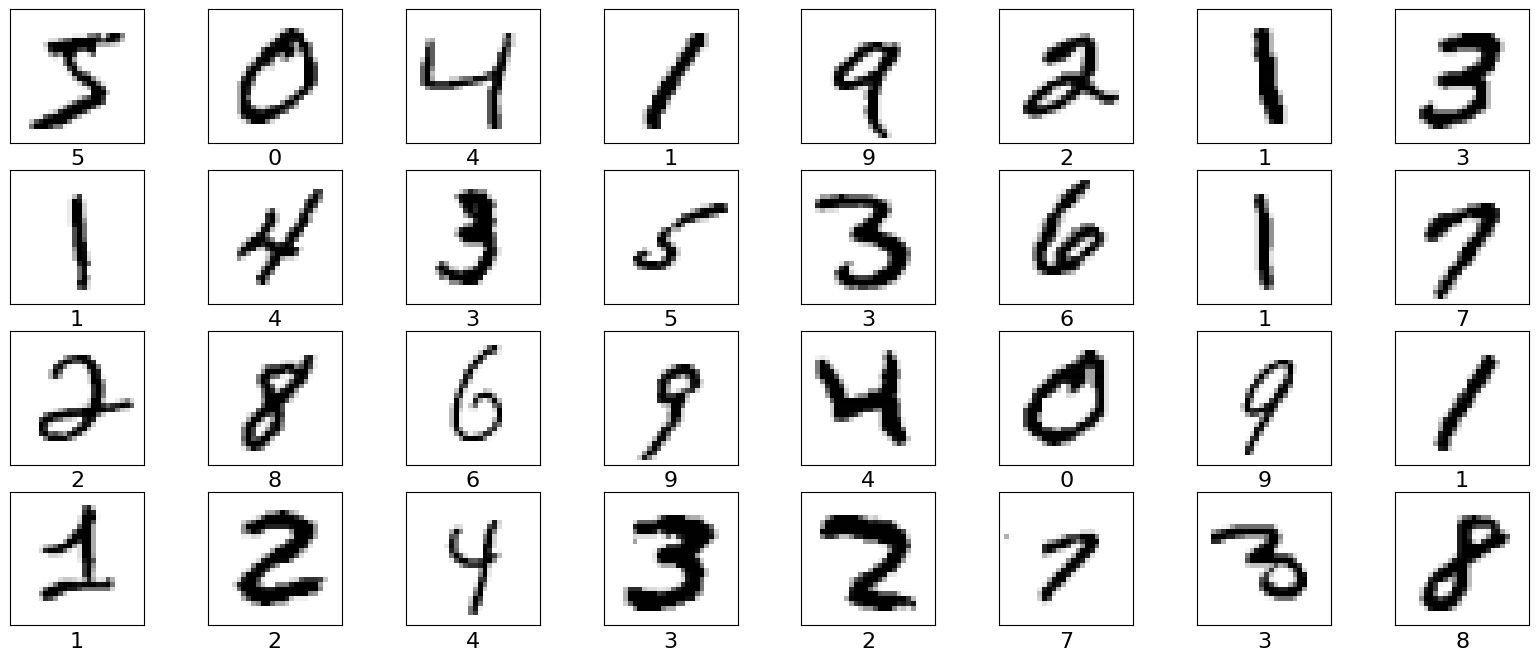

In [ ]:
#display images
row=4
col=8
i=0

plt.figure(figsize=(20,8))

for r in range(row):
  for c in range(col):
    plt.subplot(row,col,i+1)
    plt.imshow(x_train[i],cmap="gray_r")

    plt.xlabel(y_train[i],size=16)
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.show()


In [ ]:
#normalize data
x_train_normalize = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test_normalize = x_test.reshape(-1, 784).astype("float32") / 255.0

print(f"Shape of x_train_normalize: {x_train_normalize.shape}")
print(f"Shape of x_test_normalize: {x_test_normalize.shape}")

Shape of x_train_normalize: (60000, 784)
Shape of x_test_normalize: (10000, 784)


In [ ]:
#build model
model = keras.Sequential([
    #input layer
    keras.Input(shape=(784,)),
    #hidden layers
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    #output layer
    layers.Dense(units=10, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
#train the model
h=model.fit(x=x_train_normalize,y=y_train,batch_size=64,epochs=25,validation_split=0.3)

Epoch 1/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7982 - loss: 0.6526 - val_accuracy: 0.9549 - val_loss: 0.1490
Epoch 2/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9470 - loss: 0.1836 - val_accuracy: 0.9632 - val_loss: 0.1232
Epoch 3/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9594 - loss: 0.1316 - val_accuracy: 0.9682 - val_loss: 0.1081
Epoch 4/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9665 - loss: 0.1095 - val_accuracy: 0.9702 - val_loss: 0.0982
Epoch 5/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9715 - loss: 0.0930 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 6/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9753 - loss: 0.0783 - val_accuracy: 0.9717 - val_loss: 0.0955
Epoch 7/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9790 - loss: 0.0645 - val_accuracy: 0.9760 - val_loss: 0.0841
Epoch 8/25
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9796 - loss: 0.0613 - val_accuracy: 0

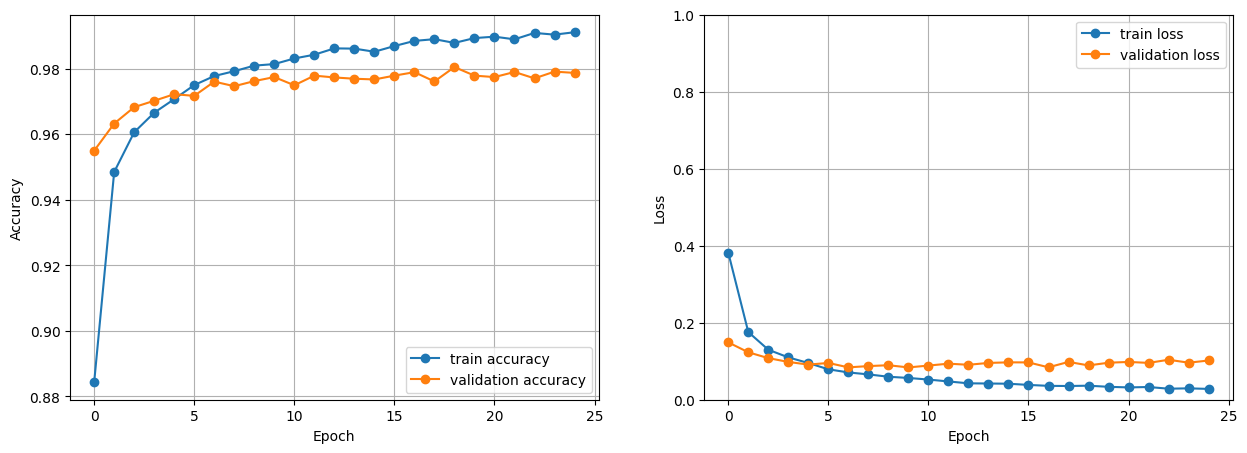

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
#model evalution
test_loss,test_acc=model.evaluate(x_test_normalize,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0982
Test Loss: 0.08371537178754807
Test Accuracy: 0.9807999730110168


In [ ]:
predictions = model.predict(x_test_normalize)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.8760342e-15 1.6122516e-09 1.0534237e-08 4.2849148e-08 2.2560030e-15
 3.3896527e-12 4.7163476e-19 9.9999994e-01 5.2128256e-13 3.8610398e-08]


In [ ]:
np.argmax(predictions[0])

np.int64(7)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


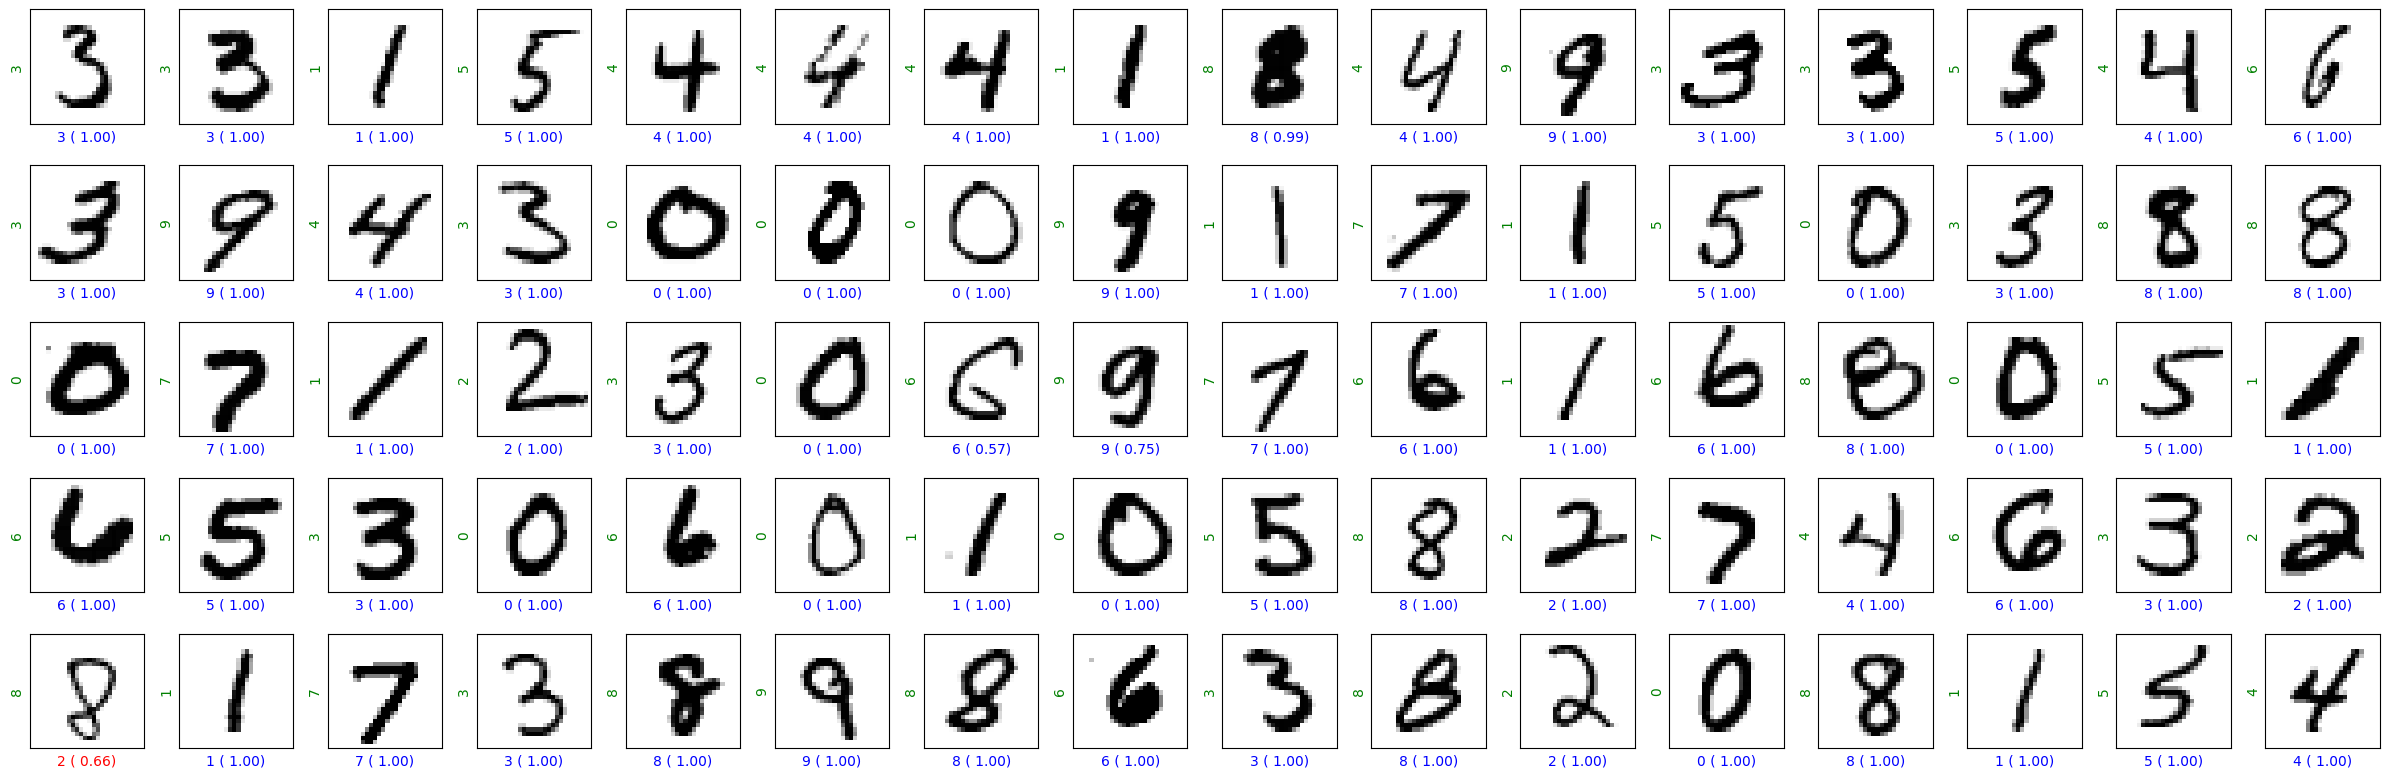

In [ ]:

ROWS = 5
COLS = 16

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test_normalize[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(24,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
model.save('digit_recognition_model.keras')
print("Model saved as 'digit_recognition_model.keras'")

Model saved as 'digit_recognition_model.keras'
